In [1]:
import numpy as np
import matplotlib as mpl

In [2]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1)
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [3]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1, as_frame=False)
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])




*   DESCR: Describe the data
*   data: Containing an array with one row per instance and one column per feature
*   target: containing an array with the labels







In [ ]:
 X, y = mnist["data"], mnist["target"]
 X.shape
 y.shape

(70000,)

In [ ]:
y.shape

(70000,)

Lấy một ví dụ, tạo hình nó có dạng 28x28 array và hiển thị nó bằng hàm Matplotlib’s imshow()

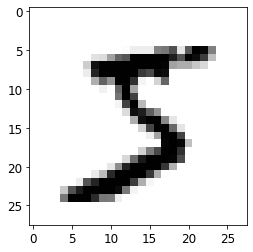

In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt
some_digit = X.to_numpy()[0]
some_digit_image = some_digit.reshape(28, 28)
plt.imshow(some_digit_image, cmap="binary")
plt.axis("on")
plt.show()

In [ ]:
some_digit_image

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [ ]:
y[0] #the label là một string

5

ML algorithms cần các con số nên

In [ ]:
y = y.astype(np.uint8) #Thay y thành một số nguyên (interger)

Chia MNIST dataset thành: Training set (60000 images đầu) và Test set (10000 images cuối) 

In [ ]:
X_train, X_test, y_train, y_test = X.to_numpy()[:60000], X.to_numpy()[60000:], y.to_numpy()[:60000], y.to_numpy()[60000:]

Training set đã được xáo trộn sẵn. Trong trường hợp này là cần thiết bởi vì một số thuật toán thường nhạy với thứ tự các ví dụ huấn luyện và sẽ hoạt động không tốt nếu nhận được nhiều ví dụ giống nhau trong một hàng. Một số trường hợp khác như giá chứng khoán, điều kiện thời tiết hoạt động trên dữ liệu thời gian thì k nên Shuffle.

**Training a Binary Classifier** Phân loại kiểu nhị phân (Đúng - sai)

In [ ]:
y_train_5 = (y_train == 5) # phân biệt 2 phân loại là: 5 và không phải 5
y_test_5 = (y_test == 5)

In [ ]:
 from sklearn.linear_model import SGDClassifier #Stochastic Gradient Descent (SGD) classifier
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(random_state=42)

Dùng sgd_clf để dò những ảnh là số 5

In [ ]:
some_digit.shape

(784,)

In [ ]:
 sgd_clf.predict([some_digit])

array([ True])

Thử đưa hình vẽ tay vào

In [ ]:
import cv2 
import matplotlib.pyplot as plt

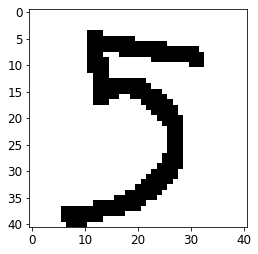

In [ ]:
file = r'/content/Untitled2.png'
test_image = cv2.imread(file, cv2.IMREAD_GRAYSCALE)
plt.imshow(test_image, cmap='gray')

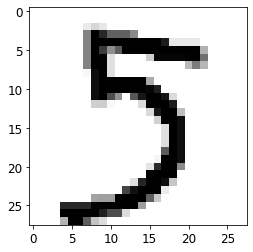

In [ ]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
img_resized = cv2.resize(test_image, (28 ,28), interpolation=cv2.INTER_LINEAR)

plt.imshow(img_resized, cmap= 'gray')


In [ ]:
img_resized

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  20,  41,  24,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0, 123, 255, 216, 159, 159, 159,
        117,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0, 123, 255, 255, 255, 255, 255,
        255, 255, 255, 255, 226,  23,  23,  23,  23,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0, 123, 255, 197, 114, 162, 255,
        255, 255, 255, 255, 255, 255, 255, 255, 255,  78,   0,   0,   0,
          0,   0],
       [  

In [ ]:
img_resized_digit = img_resized.reshape(784,)

In [ ]:
from sklearn.linear_model import SGDClassifier #Stochastic Gradient Descent (SGD) classifier
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(random_state=42)

In [ ]:
 sgd_clf.predict([img_resized_digit])

array([False])

  evaluate this model’s performance

In [ ]:
from sklearn.model_selection import cross_val_score # Dùng cross_validation score để evaluate
cross_val_score(sgd_clf, X_train, y_train_5, cv=5, scoring="accuracy")

array([0.95466667, 0.96975   , 0.9635    , 0.96533333, 0.94841667])

**Performance Measures**

***Measuring Accuracy Using Cross-Validation***

Ta định nghĩa lại StratifiedKFold (cũng gần như giống cross_val_score)

In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone
skfolds = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)
for train_index, test_index in skfolds.split(X_train, y_train_5):
 clone_clf = clone(sgd_clf)
 X_train_folds = X_train[train_index]
 y_train_folds = y_train_5[train_index]
 X_test_fold = X_train[test_index]
 y_test_fold = y_train_5[test_index]
 clone_clf.fit(X_train_folds, y_train_folds)
 y_pred = clone_clf.predict(X_test_fold)
 n_correct = sum(y_pred == y_test_fold)
 print(n_correct / len(y_pred))

0.9669
0.91625
0.96785


In [ ]:
from sklearn.model_selection import cross_val_score
>>> cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring="accuracy") #mức độ chính xác của SGD

array([0.95035, 0.96035, 0.9604 ])

Một classsifier phân loại mỗi ảnh đơn nằm trong nhóm "not-5"

In [ ]:
from sklearn.base import BaseEstimator
class Never5Classifier(BaseEstimator):
 def fit(self, X, y=None):
  return self
 def predict(self, X):
  return np.zeros((len(X), 1), dtype=bool)

In [ ]:
never_5_clf = Never5Classifier()
cross_val_score(never_5_clf, X_train, y_train_5, cv=3, scoring="accuracy") #tính mức độ chính xác của never_5_clf

array([0.91125, 0.90855, 0.90915])

Độ chính xác hơn 90%

***Confusion Matrix***

Để tính được confusion matrix, đầu tiên phải có một tập các dự đoán mà chúng được so sánh với tập đích hiện tại. Ta có thể sử dụng hàm dự đoán sau

In [ ]:
from sklearn.model_selection import cross_val_predict 
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3) #tạo tập dự đoán bằng hàm cross_val_predict

In [ ]:
from sklearn.metrics import confusion_matrix 
confusion_matrix(y_train_5, y_train_pred) #Tính confusion matrix

array([[53892,   687],
       [ 1891,  3530]])

Trong confusion matrix


*   Mỗi hàng: đại diện cho actual class
*   Mỗi cột: đại diện cho predicted class







*         --------------------     (-)  ---------------  (+)
*   non-5 (-)   -----**53892**-----------*687*
*  -- 5s--    (+) -----*1891* -----------**3530**\
Đậm: Chọn đúng\
Nghiêng: chọn nhầm


***Một phân loại hoàn hảo khi giá trị khác 0 chỉ xuất hiện trên đường chéo chính***

Ta có thể đổi hàng và cột sẽ được ma trận chuyển vị

In [ ]:
from sklearn.metrics import confusion_matrix 
confusion_matrix(y_train_pred, y_train_5)

array([[53892,  1891],
       [  687,  3530]])

In [ ]:
y_train_perfect_predictions = y_train_5 # Giả sử ta được một phân loại hoàn hảo sẽ như sau
>>> confusion_matrix(y_train_5, y_train_perfect_predictions)

array([[54579,     0],
       [    0,  5421]])

Để đánh giá mức độ chính xác thường dùng 2 cách sau:

*   precision = $\displaystyle\frac{TP}{TP+FP}$ (Tỉ lệ đoán đúng)
*   recall = $\displaystyle\frac{TP}{TP+FN}$ (Tỉ lệ phát hiện đúng)\
T, F: True (+), False (-)\
P, N: Positive (+), Negative(-)



Ta có thể dùng hàm tính precision và recall

In [ ]:
from sklearn.metrics import precision_score, recall_score
>>> precision_score(y_train_5, y_train_pred) 

0.8370879772350012

In [ ]:
recall_score(y_train_5, y_train_pred)

0.6511713705958311

*Từ kết quả ta có thể nhận thấy khi xác nhận một hình ảnh là số 5 thì khả năng đoán đúng là 83,7% và chỉ dò được 65,11% của các số 5*

Ta có thể sử dụng **harmonic mean** (trung bình điều hòa) của precision và recall để so sánh 2 classifiers. (gọi là $F_1$ score)

$F_1=\displaystyle\frac{2}{\frac{1}{\text{precision}}+\frac{1}{\text{recall}}}=2\times \frac{\text{precision} \times \text{recall}}{\text{precision + recall}}=\frac{\text{TP}}{\text{TP}+\frac{\text{FN + FP}}{2}}$

In [ ]:
from sklearn.metrics import f1_score
>>> f1_score(y_train_5, y_train_pred)

0.7325171197343846

**Precision/Recall Trade-of**
Precision và recall sẽ tăng giảm ngược nhau nên phải đánh đổi 1 trong 2

Có thể sử dụng decision_function() trả về điểm cho mỗi ví dụ sau đó dùng bất kỳ một ngưỡng (threshold) để đưa dự đoán dựa trên điểm đó

In [ ]:
y_scores = sgd_clf.decision_function([some_digit]) # gán decision score (điểm để SGD đưa ra phân loại)
>>> y_scores

array([2164.22030239])

In [ ]:
threshold = 0 #đặt ngưỡng cho dự đoán
>>> y_some_digit_pred = (y_scores > threshold) #Nếu điểm > ngưỡng đưa ra dự đoán
y_some_digit_pred

array([ True])

Vì SGDclassifier cũng dùng threshold = 0 nên kết quả trên giống kết quả của predict() (true). Ta sẽ tăng threshold lên

In [ ]:
threshold = 8000
>>> y_some_digit_pred = (y_scores > threshold)
>>> y_some_digit_pred

array([False])

Vậy threshold nào tốt nhất? \
Trước hết ta dùng hàm cross_val_predict() để lấy điểm của tất cả ví dụ trong training set và chỉ rõ là trả về decision scores thay vì trả về predictions

In [ ]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3,
 method="decision_function")

Với những điểm có được, dùng tiếp precision_recall_curve () tính precision và recall cho tất cả các threshold có thể 

In [ ]:
from sklearn.metrics import precision_recall_curve #import hàm
precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores) # Xem precisions và recalls là các hàm số theo threshold

Vẽ đồ thị của precisions và recalls theo threshold bằng Matplotlib

In [ ]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
 plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
 plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
 plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.show()

Saving figure precision_recall_vs_threshold_plot


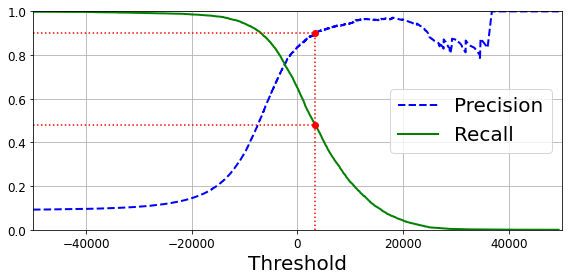

In [ ]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2) # "b--" màu blue nét đứt, precision, độ dày 2
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)       # "g-" màu green nét liền, recall, độ dày 2
    plt.legend(loc="center right", fontsize=20) # Not shown (vị trí ghi chú giữa-bên phải)
    plt.xlabel("Threshold", fontsize=20)        # Not shown (nhán trục ngang)
    plt.grid(True)                              # Not shown (có lưới)
    plt.axis([-50000, 50000, 0, 1])             # Not shown (Ngang: -50000 đến 50000 và Dọc: từ 0 đến 1)



recall_90_precision = recalls[np.argmax(precisions >= 0.90)]       # Giá trị đầu tiên của recalls khi precisions >=90%
threshold_90_precision = thresholds[np.argmax(precisions >= 0.90)] # Giá trị đầu tiên của threshold khi precisions >=90%


plt.figure(figsize=(8, 4))                                                                  # Not shown (tỉ lệ khung ngang 8 dọc 4)
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.plot([threshold_90_precision, threshold_90_precision], [0., 0.9], "r:")                 # Not shown (vị trí, "màu loại" đường đứng)
plt.plot([-50000, threshold_90_precision], [0.9, 0.9], "r:")                                # Not shown (vị trí, "màu loại" đường ngang trên)
plt.plot([-50000, threshold_90_precision], [recall_90_precision, recall_90_precision], "r:")# Not shown (vị trí, "màu loại" đường ngang dưới)
plt.plot([threshold_90_precision], [0.9], "ro")                                             # Not shown ( vị trí,màu chấm  trên)
plt.plot([threshold_90_precision], [recall_90_precision], "ro")                             # Not shown (vị trí, màu chấm  dưới)
save_fig("precision_recall_vs_threshold_plot")                                              # Not shown
plt.show()

In [ ]:
recall_90_precision

0.4799852425751706

In [ ]:
threshold_90_precision

3370.0194991439557

In [ ]:
threshold_90_precision = thresholds[np.argmax(precisions >= 0.90)]

Một cách khác để chọn precision/recall trade-off là vẽ hàm precision với đối số recall

Saving figure precision_vs_recall_plot


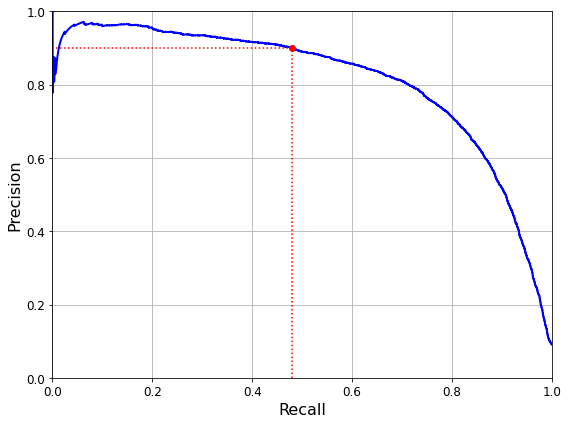

In [ ]:
def plot_precision_vs_recall(precisions, recalls):
    plt.plot(recalls, precisions, "b-", linewidth=2)
    plt.xlabel("Recall", fontsize=16)
    plt.ylabel("Precision", fontsize=16)
    plt.axis([0, 1, 0, 1])
    plt.grid(True)

plt.figure(figsize=(8, 6))
plot_precision_vs_recall(precisions, recalls)
plt.plot([recall_90_precision, recall_90_precision], [0., 0.9], "r:")
plt.plot([0.0, recall_90_precision], [0.9, 0.9], "r:")
plt.plot([recall_90_precision], [0.9], "ro")
save_fig("precision_vs_recall_plot")
plt.show()

Để đưa ta predictions (trên training set) ta có thể dùng classifier's predict() method, hoặc có thể dùng

In [ ]:
y_train_pred_90 = (y_scores >= threshold_90_precision) # Đưa ra dự đoán trên training set khi điểm >= ngưỡng (~3370))

Tính precision và recall của predictions

In [ ]:
precision_score(y_train_5,y_train_pred_90)

0.9000345901072293

In [ ]:
recall_score(y_train_5,y_train_pred_90)

0.4799852425751706

***The ROC Curve*** (Receiver operating characteristic Curve)\
là hàm *True positive rate* (recall) với đối số *False positive rate* (FPR)\
FPR = 1 - True negative rate (TNR(đoán đúng (-) trên (-)), specificity)\
Khi đó, ROC curve là hàm *Secificity (recall)* với đối số *1-specificity*

Trước tiên tính TPR và FPR với các giá trị khác nhau của threshold = hàm roc_curve()

In [ ]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)

Saving figure roc_curve_plot


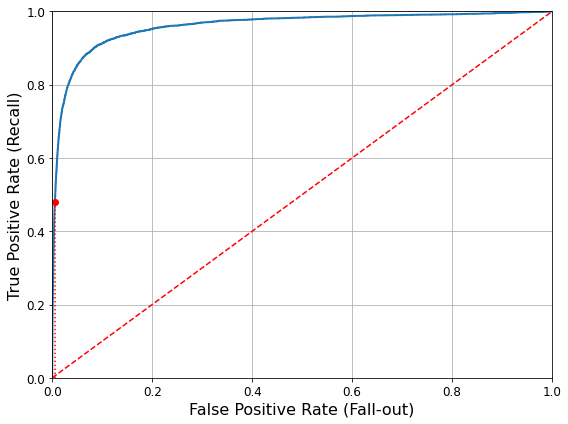

In [ ]:
def plot_roc_curve(fpr, tpr, label=None):
 plt.plot(fpr, tpr, linewidth=2, label=label) #hàm của tpr đối với fpr
 plt.plot([0, 1], [0, 1], 'r--') # đường chéo
 plt.axis([0, 1, 0, 1])
 plt.xlabel("False Positive Rate (Fall-out)", fontsize=16)
 plt.ylabel("True Positive Rate (Recall)", fontsize=16)
 plt.grid(True)

plt.figure(figsize=(8,6))
plot_roc_curve(fpr, tpr)
fpr_90 = fpr[np.argmax(tpr >= recall_90_precision)] 
plt.plot([fpr_90, fpr_90], [0., recall_90_precision], "r:")   # Not shown
plt.plot([0.0, fpr_90], [recall_90_precision, recall_90_precision], "r:")  # Not shown
plt.plot([fpr_90], [recall_90_precision], "ro")               # Not shown
save_fig("roc_curve_plot")                 
plt.show()

Ta có thể đo diện tích dưới đường cong (area under curve (AUC)). Một calssifier hoàn hảo có ROC AUC bằng 1, một classifier ngẫu nhiên sẽ có ROC AUC bằng 0.5

In [ ]:
from sklearn.metrics import roc_auc_score
>>> roc_auc_score(y_train_5, y_scores)

0.9604938554008616

In [ ]:
from sklearn.ensemble import RandomForestClassifier
forest_clf = RandomForestClassifier(random_state=42)
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3,
 method="predict_proba")

Saving figure roc_curve_comparison_plot


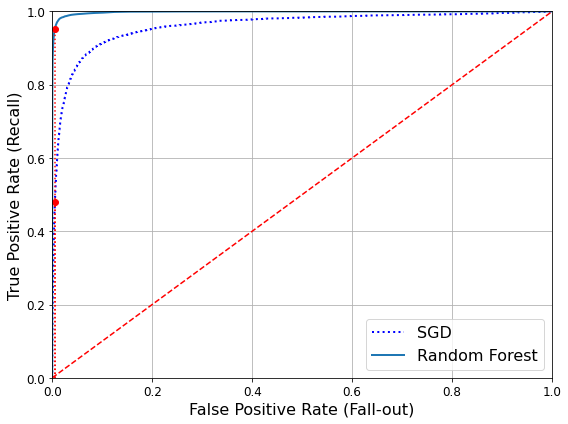

In [ ]:
y_scores_forest = y_probas_forest[:, 1] # score = proba of positive class
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train_5,y_scores_forest)
recall_for_forest = tpr_forest[np.argmax(fpr_forest >= fpr_90)]

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, "b:", linewidth=2, label="SGD")
plot_roc_curve(fpr_forest, tpr_forest, "Random Forest")
plt.plot([fpr_90, fpr_90], [0., recall_90_precision], "r:")
plt.plot([0.0, fpr_90], [recall_90_precision, recall_90_precision], "r:")
plt.plot([fpr_90], [recall_90_precision], "ro")
plt.plot([fpr_90, fpr_90], [0., recall_for_forest], "r:")
plt.plot([fpr_90], [recall_for_forest], "ro")
plt.grid(True)
plt.legend(loc="lower right", fontsize=16)
save_fig("roc_curve_comparison_plot")
plt.show()  

In [ ]:
roc_auc_score(y_train_5, y_scores_forest)

0.9983436731328145

In [ ]:
y_train_pred_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3)
precision_score(y_train_5, y_train_pred_forest)

0.9905083315756169

In [ ]:
recall_score(y_train_5, y_train_pred_forest)

0.8662608374838591

**Multiclass Classification**

In [ ]:
from sklearn.svm import SVC #Dùng thử Support Vector Machine classifier
>>> svm_clf = SVC()
>>> svm_clf.fit(X_train, y_train) # y_train, not y_train_5
>>> svm_clf.predict([some_digit])

array([5], dtype=uint8)

In [ ]:
some_digit_scores = svm_clf.decision_function([some_digit]) #Decision function trả về bộ 10 điểm cho mỗi ví dụ
>>> some_digit_scores

array([[ 1.72501977,  2.72809088,  7.2510018 ,  8.3076379 , -0.31087254,
         9.3132482 ,  1.70975103,  2.76765202,  6.23049537,  4.84771048]])

In [ ]:
np.argmax(some_digit_scores)

5

In [ ]:
svm_clf.classes_

5

In [ ]:
 svm_clf.classes_[5]

5

Tạo một muticlass classifier using the OvR strategy, trên nền SVC:

In [ ]:
from sklearn.multiclass import OneVsRestClassifier
>>> ovr_clf = OneVsRestClassifier(SVC())
>>> ovr_clf.fit(X_train, y_train)
ovr_clf.predict([some_digit])

array([5], dtype=uint8)

In [ ]:
len(ovr_clf.estimators_)

10

In [ ]:
sgd_clf.fit(X_train, y_train) #training an SGDclassifier (ỏ RandomForestClassifier)
>>> sgd_clf.predict([some_digit])

array([3], dtype=uint8)

In [ ]:
sgd_clf.decision_function([some_digit]) # SGD classifier trả về điểm mỗi class

array([2164.22030239])

In [ ]:
cross_val_score(sgd_clf, X_train, y_train, cv=3, scoring="accuracy") # Dùng cross_validation_score để đánh giá SDGClass accuracy

array([0.87365, 0.85835, 0.8689 ])

In [ ]:
from sklearn.preprocessing import StandardScaler #Đơn giản hóa Inputs để tăng accuracy
>>> scaler = StandardScaler()
>>> X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))
>>> cross_val_score(sgd_clf, X_train_scaled, y_train, cv=3, scoring="accuracy")

**Error Analysis**

In [ ]:
y_train_pred = cross_val_predict(sgd_clf, X_train_scaled, y_train, cv=3) # Dùng cross-val để dự đoán  
>>> conf_mx = confusion_matrix(y_train, y_train_pred) #Lấy confusion-matrix
>>> conf_mx

NameError: ignored

In [ ]:
plt.matshow(conf_mx, cmap=plt.cm.gray) # Dùng Matplotlib’s matshow() function để dễ quan sát hơn
plt.show()

In [ ]:
row_sums = conf_mx.sum(axis=1, keepdims=True) #đặt tổng
norm_conf_mx = conf_mx / row_sums #Chia cho tổng để tính tỉ số lỗi sai thay vì so sánh số lượng lỗi sai
np.fill_diagonal(norm_conf_mx, 0)
plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
plt.show()

Thử lệnh

In [ ]:
noise = np.random.randint(0, 100, (5,7)) #Lấy ngẫu nhiên các số nguyên 0-100 và tạo thành ma trận 5 hàng 7 cột
noise

array([[79, 14, 61, 61, 46, 61, 50],
       [54, 63,  2, 50,  6, 20, 72],
       [38, 17,  3, 88, 59, 13,  8],
       [89, 52,  1, 83, 91, 59, 70],
       [43,  7, 46, 34, 77, 80, 35]])